In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.version
#import vaex
#import vaex.jupyter.model as vjm


# To ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset : Imported in csv format as the data received is in .txt format.
dataset = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t',low_memory=False)

In [3]:
# Checking heads of the dataset
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


This file containg complete data of the loan issued by the XYZ Corp. from the year 2007 to 2015. It provides Loan details along with the credit history, payment details, outstanding amount, defaulter, etc,.

In [4]:
dataset.shape

(855969, 73)

##### Imported text file consists of 855969 rows and 73 columns.

# Data Preprocessing
Exploring data by checking its dtypes, missing/null values if any and dropping the non-essentials columns.

In [5]:
# For exploring all the availabe rows and columns data.
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [6]:
dataset.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

In [7]:
for i in dataset.columns:
    print({i:dataset[i].unique()})

{'id': array([ 1077501,  1077430,  1077175, ..., 36271333, 36490806, 36271262],
      dtype=int64)}
{'member_id': array([ 1296599,  1314167,  1313524, ..., 38982739, 39222577, 38982659],
      dtype=int64)}
{'loan_amnt': array([ 5000.,  2500.,  2400., ..., 32825., 32575., 34175.])}
{'funded_amnt': array([ 5000.,  2500.,  2400., ..., 32825., 32575., 34175.])}
{'funded_amnt_inv': array([ 4975.,  2500.,  2400., ..., 33625., 34125., 30525.])}
{'term': array([' 36 months', ' 60 months'], dtype=object)}
{'int_rate': array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 2

{'zip_code': array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       

{'inq_last_6mths': array([1., 5., 2., 0., 3., 4., 6., 7., 8.])}
{'mths_since_last_delinq': array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84.,  88.,
        87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,  94.,
       102., 129., 113., 139., 131., 156., 143., 109., 119., 149., 118.,
       130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92., 108.,
       133., 104., 111., 135., 10

       19.92, 18.65, 16.69, 20.42])}
{'verification_status_joint': array([nan, 'Not Verified', 'Source Verified', 'Verified'], dtype=object)}
{'acc_now_delinq': array([ 0.,  1.,  2.,  3.,  5.,  4.,  6., 14.])}
{'tot_coll_amt': array([   nan,     0., 15386., ..., 13383., 22129.,  8567.])}
{'tot_cur_bal': array([    nan, 114834.,  14123., ..., 211412., 237002., 140285.])}
{'open_acc_6m': array([nan,  1.,  2.,  0.,  3.,  4.,  5.,  6.,  7., 12.,  8.,  9.])}
{'open_il_6m': array([nan,  2.,  1.,  3.,  7.,  0.,  4.,  6.,  5.,  8., 15., 11., 10.,
        9., 16., 13., 12., 17., 14., 19., 18., 25., 30., 32., 34., 23.,
       20., 33., 22., 26., 24., 21., 27., 28., 40.])}
{'open_il_12m': array([nan,  0.,  1.,  4.,  2.,  3.,  5.,  6.,  8.,  7.,  9., 10., 12.])}
{'open_il_24m': array([nan,  0.,  3.,  1.,  7.,  2.,  4.,  5., 11.,  6.,  9.,  8., 10.,
       12., 14., 13., 15.])}
{'mths_since_rcnt_il': array([ nan,  28.,   2.,  45.,  12.,   3.,   5.,  19.,   6.,  82.,  25.,
         7.,  56.,  20.,  

In [8]:
a=dataset.isnull().sum() # Missing values sum
b=round(100*(dataset.isnull().sum()/len(dataset.index)), 2)  # Missing values in percentage
df=pd.DataFrame(data=[a,b])
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,844360.00,842681.00,842681.00,842681.00,842681.00,67313.00,842681.00,842681.00,842681.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,98.64,98.45,98.45,98.45,98.45,7.86,98.45,98.45,98.45,0.0


##### Droping the columns with huge number of missing values

In [9]:
dataset=dataset.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog',
                      'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                      'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1)


###### loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
###### funded_amnt: The total amount committed to that loan at that point in time.
###### funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
###### int_rate: Interest Rate on the loan.
###### installment: The monthly payment owed by the borrower if the loan originates.

<AxesSubplot:xlabel='installment', ylabel='Density'>

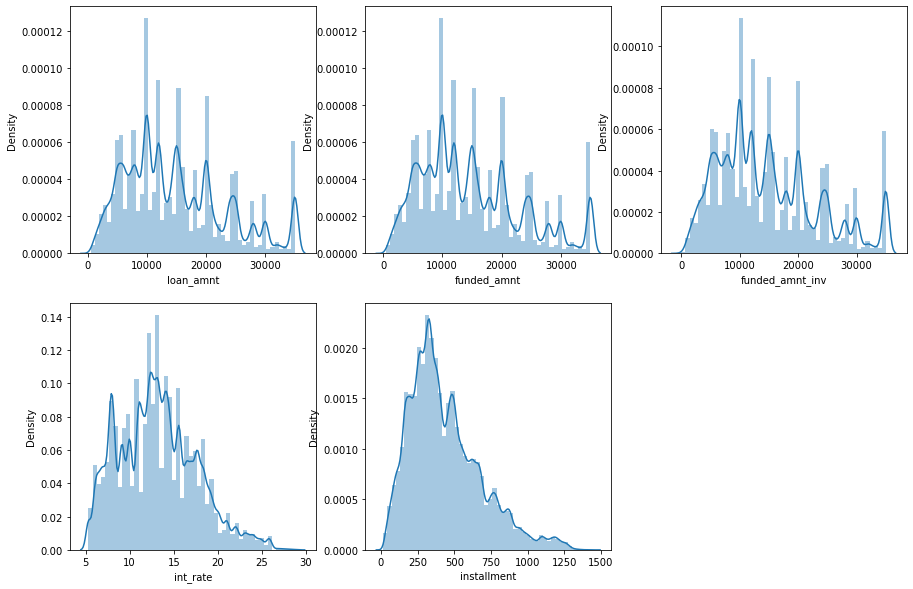

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(dataset["loan_amnt"])
plt.subplot(2,3,2)
sns.distplot(dataset["funded_amnt"])
plt.subplot(2,3,3)
sns.distplot(dataset["funded_amnt_inv"])
plt.subplot(2,3,4)
sns.distplot(dataset["int_rate"])
plt.subplot(2,3,5)
sns.distplot(dataset["installment"])

##### Term: Number of payments of the loan. Values are in form of months with either 36 months or 60 months.

<AxesSubplot:xlabel='term', ylabel='default_ind'>

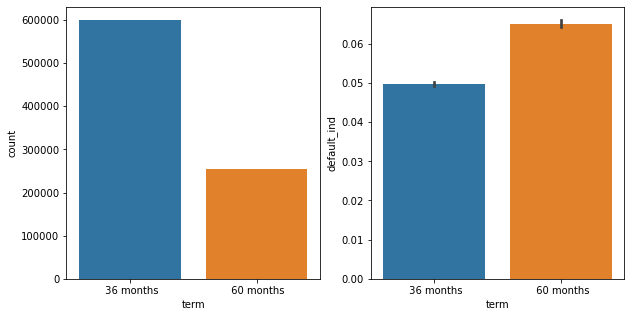

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset["term"])
plt.subplot(1,2,2)
sns.barplot(x="term", y="default_ind", data=dataset)

##### grade: 

<AxesSubplot:xlabel='grade', ylabel='default_ind'>

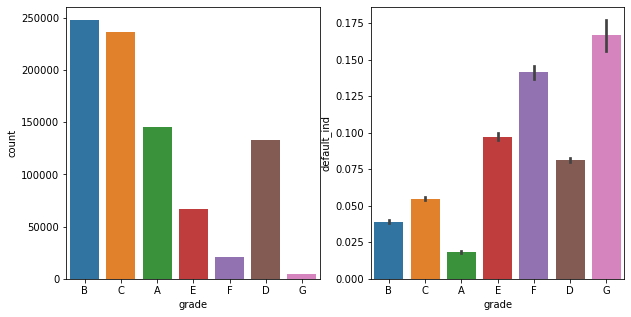

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset["grade"])
plt.subplot(1,2,2)
sns.barplot(x="grade", y="default_ind", data=dataset)

##### sub_grade:

<AxesSubplot:xlabel='sub_grade', ylabel='default_ind'>

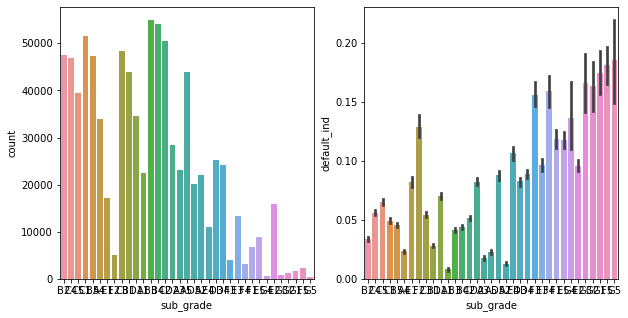

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset["sub_grade"])
plt.subplot(1,2,2)
sns.barplot(x="sub_grade", y="default_ind", data=dataset)

##### *we have already seen the grade column in subgrade the number and grade column are combined ,so let's see ony the numbers in this column

In [14]:
def sub_grade_no(data):
    data['sub_grade'] = data['sub_grade'].map(lambda x: int(x.lstrip('ABCDEFG')))
    return data

In [15]:
sub_grade_no(dataset).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,2,...,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,5,...,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,1,...,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,5,...,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [16]:
dataset.sub_grade.value_counts()

1    178403
4    174050
2    170769
3    169949
5    162798
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='sub_grade', ylabel='default_ind'>

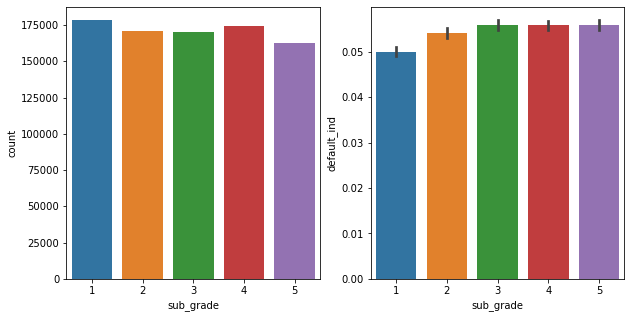

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset["sub_grade"])
plt.subplot(1,2,2)
sns.barplot(x="sub_grade", y="default_ind", data=dataset)

#### emp_title: Title provided by the borrower while applying/registering for the loan.

In [18]:
dataset.emp_title.isnull().sum()/dataset.shape[0] * 100

5.776260588876466

In [19]:
dataset.emp_title.value_counts().head()

Teacher             12965
Manager             10821
Registered Nurse     5341
RN                   5182
Owner                5157
Name: emp_title, dtype: int64

In [20]:
dataset.emp_title.value_counts()[0]/dataset.shape[0] * 100

1.5146576569945873

##### emp_length: employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 meansten or more years.

In [21]:
dataset.emp_length.isnull().sum()/dataset.shape[0] * 100

5.030672839787422

In [22]:
dataset.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

##### Here 10+ years representing [(282090/812908)*100=34.8] 34.8% of data so we can replace the missing values with the mode.

In [23]:
dataset['emp_length'].fillna(dataset['emp_length'].mode()[0], inplace=True)

In [24]:
dataset.emp_length.value_counts()

10+ years    325151
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

##### home_ownership: Status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [25]:
dataset.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

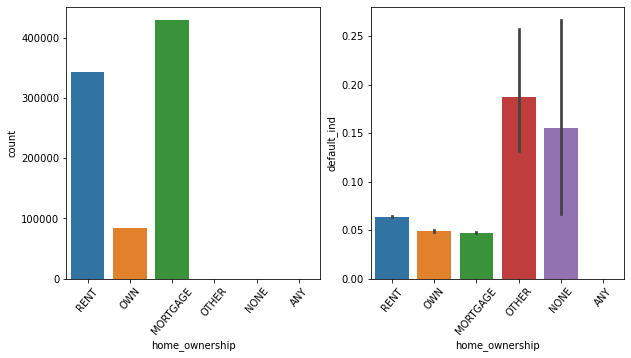

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(dataset["home_ownership"])
plt.xticks(rotation=50)
plt.subplot(1,2,2)
sns.barplot(x="home_ownership", y="default_ind", data=dataset)
plt.xticks(rotation=50)
plt.show()

##### annual_inc: Income updated by the borrower at the time of registration.
It is heavily skewed with outlier. Skewness need to be reduced.

(0.0, 1000000.0)

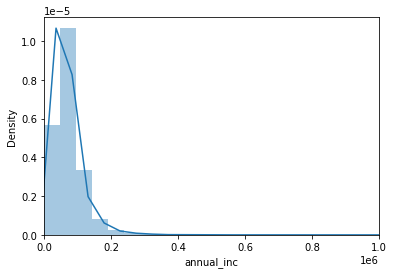

In [27]:
sns.distplot(dataset["annual_inc"], bins=200)
plt.xlim(0,1e6)

##### verification_status: Source verification status

In [28]:
dataset.verification_status.value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

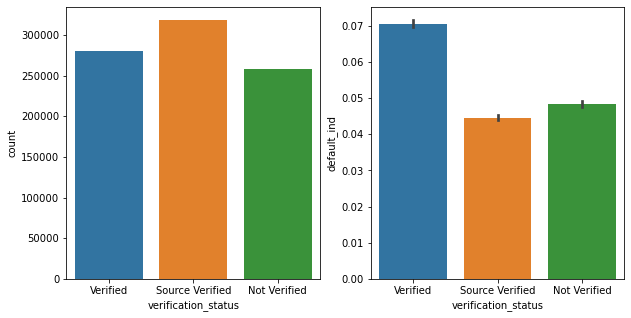

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(dataset["verification_status"])
plt.subplot(1,2,2)
sns.barplot(x="verification_status", y="default_ind", data=dataset)
plt.show()

##### issue_d: The month which the loan was funded
As we can see, it is a time-series data(dates). If we include issue_d in our model building, it will increase our
number of features.  There is no significant impact going to be on our model, it would be better to remove it.


##### we will remove this variable after our train test split as per the requirement we need to split our data on the issue_d basis.

In [30]:
dataset.issue_d.value_counts()

Oct-2015    48212
Jul-2015    44906
Oct-2014    37442
Nov-2015    37211
Dec-2015    35638
            ...  
Aug-2007       33
Sep-2008       32
Jul-2007       30
Sep-2007       18
Jun-2007        1
Name: issue_d, Length: 103, dtype: int64

In [31]:
#def drop_issue_d(data):
 #   data.drop('issue_d', axis=1, inplace=True)
  #  return None
#drop_issue_d(dataset)

##### pymnt_plan: Indicates if a payment plan has been put in place for the loan

In [32]:
dataset.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

##### purpose: A category provided by the borrower for the loan request. 

In [33]:
dataset.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

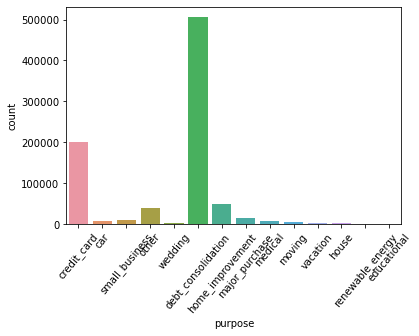

In [34]:
sns.countplot(dataset["purpose"])
plt.xticks(rotation=50)

##### title: The loan title provided by the borrower

In [35]:
dataset.title.value_counts()

Debt consolidation                   398089
Credit card refinancing              159228
Home improvement                      38633
Other                                 30522
Debt Consolidation                    15469
                                      ...  
Desperation                               1
CreditRePayment                           1
A Win-Win Situation :)                    1
Finally Get Rid of Credit Cards!!         1
payoff promotional/payday loans           1
Name: title, Length: 60991, dtype: int64

In [36]:
dataset.title.isnull().sum()

33

In [37]:
#Replacing the missing values with mode 
dataset['title'].fillna(dataset['title'].mode()[0], inplace=True)

##### zip_code: 

In [38]:
dataset.zip_code.value_counts()

945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
         ... 
511xx       1
205xx       1
694xx       1
892xx       1
835xx       1
Name: zip_code, Length: 931, dtype: int64

Same will be dropped as it is not significant for the model

##### addr_state: 

In [39]:
dataset.addr_state.value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

Same will be dropped as it is not significant for the model

##### dti : Loan Eligibity

Data is skewed and same needs to reduced for considering the same in the model.

##### delinq_2yrs: Failed to pay the EMI on time for the said period

In [40]:
dataset.delinq_2yrs.value_counts()

0.0     692685
1.0     108733
2.0      32076
3.0      11410
4.0       5077
5.0       2583
6.0       1399
7.0        732
8.0        438
9.0        269
10.0       179
11.0       116
12.0        87
13.0        57
14.0        44
15.0        26
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
26.0         2
30.0         1
21.0         1
20.0         1
39.0         1
27.0         1
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

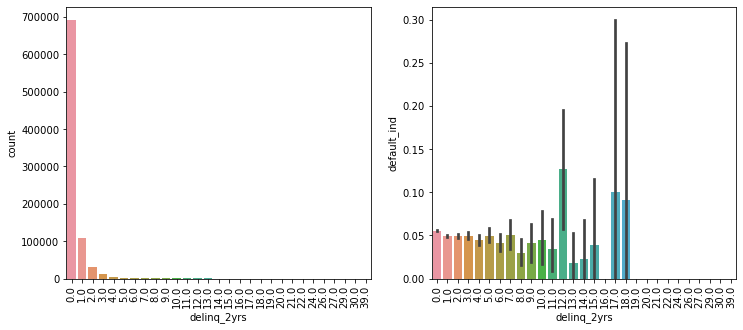

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["delinq_2yrs"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="delinq_2yrs", y="default_ind", data=dataset)
plt.xticks(rotation="vertical")
plt.show()

##### earliest_cr_line: The month the borrower's earliest reported credit line was opened
Same will be dropped.

In [42]:
dataset.earliest_cr_line.value_counts()

Aug-2001    6433
Aug-2000    6322
Oct-2000    6117
Oct-2001    5924
Aug-2002    5858
            ... 
Mar-1959       1
May-1957       1
Jul-1955       1
Jun-1955       1
May-1953       1
Name: earliest_cr_line, Length: 697, dtype: int64

## Dropping the columns based on differnt reason for each column

In [43]:
dataset=dataset.drop(['emp_title','pymnt_plan','title','zip_code','addr_state','earliest_cr_line'],1)

 1. emp_title: In emp_title the mode(most frequently position is Teacher) but it is only 1.5% of whole data , it means Teacher cannot represent whole column of emp_title. And most importantly it would not not add any significant information in predicting the result,so i will drop this feature.

2. pymnt_plan: Excluded this variable as mostly their is no plan is assign to the observatoins ,not providing any informatoin.

3. title: Length of the variable is " "on very higher side and dropping the same will not affect the model.

4. zip_code: Length of the cariable is " " and keeping the same will mislead the model, hence dropping the same.

5. addr_state: Length of the cariable is " " and keeping the same will mislead the model, hence dropping the same.

6. earliest_cr_line: Length of the variable is high, thus increasing the dimenson of the model by not providing any significant information.

##### inq_last_6mths: inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [44]:
dataset.inq_last_6mths.value_counts()

0.0    482665
1.0    232983
2.0     90479
3.0     35902
4.0      9589
5.0      3359
6.0       922
7.0        48
8.0        22
Name: inq_last_6mths, dtype: int64

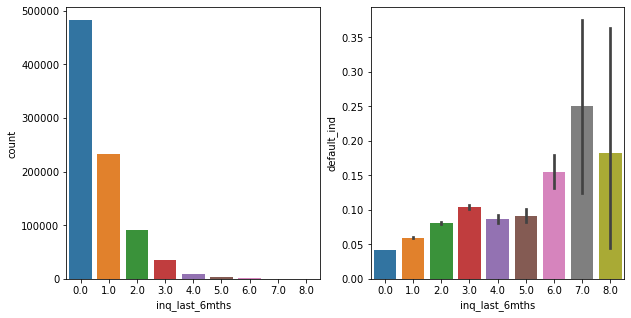

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(dataset["inq_last_6mths"])
plt.xticks(rotation="horizontal")
plt.subplot(1,2,2)
sns.barplot(x="inq_last_6mths", y="default_ind", data=dataset)
plt.xticks(rotation="horizontal")
plt.show()

##### open_acc: The number of open credit lines in the borrower's credit file.

In [46]:
dataset.open_acc.value_counts().head()

9.0     77533
10.0    75611
8.0     73967
11.0    69742
7.0     65607
Name: open_acc, dtype: int64

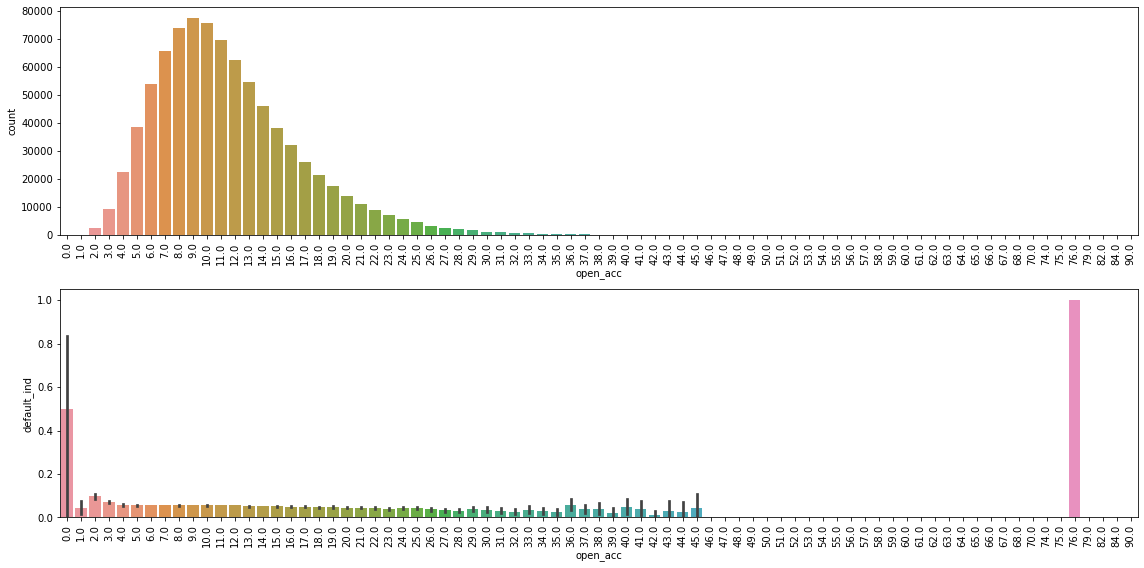

In [47]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(dataset["open_acc"])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(x="open_acc", y="default_ind", data=dataset)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### pub_rec: Number of derogatory public records

In [48]:
dataset.pub_rec.value_counts().head()

0.0    725455
1.0    108920
2.0     14250
3.0      4305
4.0      1496
Name: pub_rec, dtype: int64

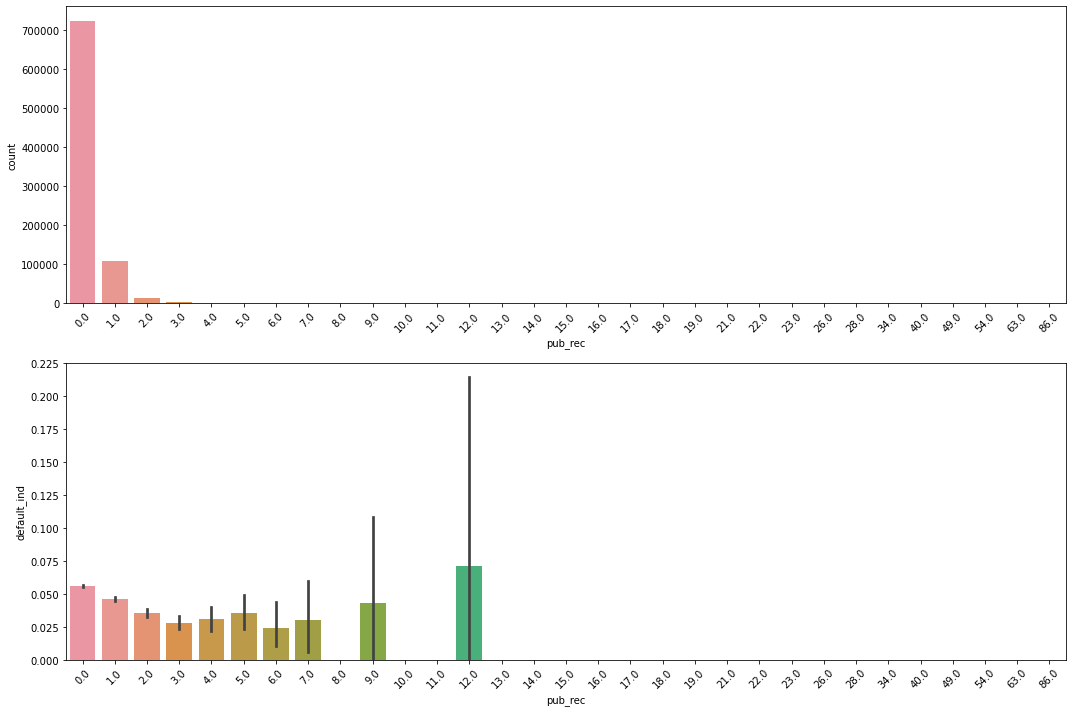

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(dataset["pub_rec"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="pub_rec", y="default_ind", data=dataset)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### revol_bal: Total credit revolving balance

##### revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [50]:
dataset.revol_util.isnull().sum()

446

In [51]:
dataset.revol_util.value_counts().head()

0.0     3361
58.0    1723
53.0    1702
59.0    1694
61.0    1684
Name: revol_util, dtype: int64

In [52]:
dataset['revol_util'].fillna(dataset['revol_util'].median(), inplace=True)

##### total_acc: The total number of credit lines currently in the borrower's credit file

In [53]:
dataset.total_acc.value_counts().head()

22.0    31159
20.0    30955
21.0    30917
19.0    30545
23.0    30213
Name: total_acc, dtype: int64

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

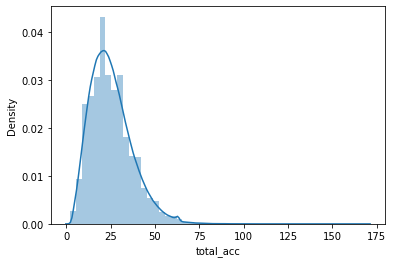

In [54]:
sns.distplot(dataset.total_acc)

##### initial_list_status: The initial listing status of the loan. Possible values are – W, F

In [55]:
dataset.initial_list_status.value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

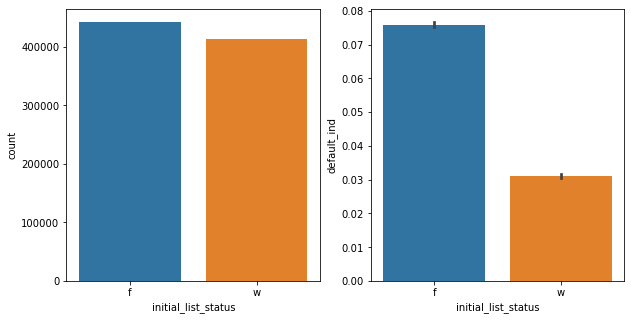

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(dataset["initial_list_status"])
plt.subplot(1,2,2)
sns.barplot(x="initial_list_status", y="default_ind", data=dataset)
plt.show()

##### out_prncp: Remaining outstanding principal for total amount funded

In [57]:
dataset.out_prncp.value_counts().head(10)

0.0        253030
10000.0       578
15000.0       481
12000.0       480
20000.0       472
35000.0       396
5000.0        350
24000.0       285
8000.0        281
6000.0        265
Name: out_prncp, dtype: int64

In [58]:
dataset.out_prncp.value_counts().head(5)/dataset.shape[0] * 100

0.0        29.560650
10000.0     0.067526
15000.0     0.056194
12000.0     0.056077
20000.0     0.055142
Name: out_prncp, dtype: float64

In [59]:
#def drop_out_prncp(data):
 #   data.drop('out_prncp', axis=1, inplace=True)
  #  return None
#drop_out_prncp(dataset)

##### out_prncp_inv:  Remaining outstanding principal for portion of total amount funded by investors

In [60]:
dataset.out_prncp_inv.value_counts().head(5)

0.0        253030
10000.0       567
12000.0       463
15000.0       460
20000.0       436
Name: out_prncp_inv, dtype: int64

In [61]:
dataset.out_prncp_inv.value_counts().head(5)/dataset.shape[0] * 100

0.0        29.560650
10000.0     0.066241
12000.0     0.054091
15000.0     0.053740
20000.0     0.050936
Name: out_prncp_inv, dtype: float64

In [62]:
#def drop_out_prncp_inv(data):
  #  data.drop('out_prncp_inv', axis=1, inplace=True)
 #   return None
#drop_out_prncp_inv(dataset)

##### total_pymnt: Payments received to date for total amount funded

In [63]:
dataset.total_pymnt.value_counts().head()

0.00       8960
938.06      134
648.57      133
623.86      131
1566.46     117
Name: total_pymnt, dtype: int64

##### total_rec_late_fee: 

In [64]:
dataset.total_rec_late_fee.value_counts().head(10)

0.00     845995
15.00      2248
30.00       249
45.00        28
16.37        15
17.41        14
20.60        13
16.84        13
16.06        13
60.00        13
Name: total_rec_late_fee, dtype: int64

In [65]:
dataset.total_rec_late_fee.value_counts().head(10)/dataset.shape[0] * 100

0.00     98.834771
15.00     0.262626
30.00     0.029090
45.00     0.003271
16.37     0.001752
17.41     0.001636
20.60     0.001519
16.84     0.001519
16.06     0.001519
60.00     0.001519
Name: total_rec_late_fee, dtype: float64

98% of the valus are zero better to drop it.

In [66]:
def drop_total_rec_late_fee(data):
    data.drop('total_rec_late_fee', axis=1, inplace=True)
    return None
drop_total_rec_late_fee(dataset)

##### recoveries: post charge off gross recovery

In [67]:
dataset.recoveries.value_counts().head(10)

0.00      831782
200.00        10
14.28          9
11.70          9
100.00         8
800.00         8
10.40          8
10.00          8
16.50          8
11.20          7
Name: recoveries, dtype: int64

In [68]:
dataset.recoveries.value_counts().head(10)/dataset.shape[0] * 100

0.00      97.174314
200.00     0.001168
14.28      0.001051
11.70      0.001051
100.00     0.000935
800.00     0.000935
10.40      0.000935
10.00      0.000935
16.50      0.000935
11.20      0.000818
Name: recoveries, dtype: float64

97% of the valus are zero better to drop it.

In [69]:
def drop_recoveries(data):
    data.drop('recoveries', axis=1, inplace=True)
    return None
drop_recoveries(dataset)

##### collection_recovery_fee:  post charge off collection fee / late fee charges

In [70]:
dataset.collection_recovery_fee.value_counts().head(10)

0.00    832934
2.00        15
4.52        11
1.88        11
2.52        11
1.80        11
1.20        11
1.69        10
1.55        10
2.61        10
Name: collection_recovery_fee, dtype: int64

In [71]:
dataset.collection_recovery_fee.value_counts().head(10)/dataset.shape[0] * 100

0.00    97.308898
2.00     0.001752
4.52     0.001285
1.88     0.001285
2.52     0.001285
1.80     0.001285
1.20     0.001285
1.69     0.001168
1.55     0.001168
2.61     0.001168
Name: collection_recovery_fee, dtype: float64

97% of the valus are zero better to drop it.

In [72]:
def drop_collection_recovery_fee(data):
    data.drop('collection_recovery_fee', axis=1, inplace=True)
    return None
drop_collection_recovery_fee(dataset)

##### last_pymnt_d: Last month payment was received

In [73]:
dataset.last_pymnt_d.value_counts().head()

Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
Name: last_pymnt_d, dtype: int64

It's a time series data,better to drop it.

In [74]:
def drop_last_pymnt_d(data):
    data.drop('last_pymnt_d', axis=1, inplace=True)
    return None
drop_last_pymnt_d(dataset)

##### last_pymnt_amnt: Last total payment amount received

In [75]:
dataset.last_pymnt_amnt.value_counts().head()

0.00      8867
327.34    2053
318.79    1767
312.86    1437
392.81    1374
Name: last_pymnt_amnt, dtype: int64

##### last_credit_pull_d: The most recent month LC pulled credit for this loan

In [76]:
dataset.last_credit_pull_d.value_counts().head(10)

Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
Jul-2015      8603
Aug-2015      7942
Jun-2015      7090
Apr-2015      6126
May-2015      5899
Name: last_credit_pull_d, dtype: int64

It's a time series data,better to drop it.

In [77]:
def drop_last_credit_pull_d(data):
    data.drop('last_credit_pull_d', axis=1, inplace=True)
    return None
drop_last_credit_pull_d(dataset)

##### collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections

In [78]:
dataset.collections_12_mths_ex_med.value_counts().head(10)

0.0     844768
1.0      10320
2.0        709
3.0         80
4.0         22
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [79]:
dataset.collections_12_mths_ex_med.value_counts().head(10)/dataset.shape[0] * 100

0.0     98.691425
1.0      1.205651
2.0      0.082830
3.0      0.009346
4.0      0.002570
5.0      0.000818
6.0      0.000234
7.0      0.000117
16.0     0.000117
20.0     0.000117
Name: collections_12_mths_ex_med, dtype: float64

99% of the valus is equal to zero better to drop it.

In [80]:
def drop_collections_12_mths_ex_med(data):
    data.drop('collections_12_mths_ex_med', axis=1, inplace=True)
    return None
drop_collections_12_mths_ex_med(dataset)

##### policy_code: 
 publicly available policy_code=1 & 
 new products not publicly available policy_code=2

In [81]:
dataset.policy_code.value_counts()

1.0    855969
Name: policy_code, dtype: int64

It has only one category, no use in analysis because all the observation has only single value no need to analys,better to drop it.

In [82]:
def drop_policy_code(data):
    data.drop('policy_code', axis=1, inplace=True)
    return None
drop_policy_code(dataset)

##### application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [83]:
dataset.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

No use in analysis because all the observation has almost same value no need to analyse, better to drop it.

In [84]:
def drop_application_type(data):
    data.drop('application_type', axis=1, inplace=True)
    return None
drop_application_type(dataset)

##### acc_now_delinq: The number of accounts on which the borrower is now delinquent.

In [85]:
dataset.acc_now_delinq.value_counts()

0.0     852039
1.0       3693
2.0        198
3.0         28
4.0          6
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

In [86]:
dataset.acc_now_delinq.value_counts()/dataset.shape[0] * 100

0.0     99.540871
1.0      0.431441
2.0      0.023132
3.0      0.003271
4.0      0.000701
5.0      0.000350
6.0      0.000117
14.0     0.000117
Name: acc_now_delinq, dtype: float64

98% of the data has value equal to zero ,better to frop it.

In [87]:
def drop_acc_now_delinq(data):
    data.drop('acc_now_delinq', axis=1, inplace=True)
    return None
drop_acc_now_delinq(dataset)

##### tot_coll_amt: Total collection amounts ever owed

In [88]:
dataset.tot_coll_amt.isnull().sum()/dataset.shape[0]

0.07863953016990101

In [89]:
dataset.tot_coll_amt.value_counts().head()/dataset.shape[0]*100

0.0      79.098893
50.0      0.197203
100.0     0.152692
75.0      0.116593
200.0     0.080377
Name: tot_coll_amt, dtype: float64

7.8% of values are missing and 79% are having 0.0 as its value. Let's drop this column.

In [90]:
def drop_tot_coll_amt(data):
    data.drop('tot_coll_amt', axis=1, inplace=True)
    return None
drop_tot_coll_amt(dataset)

##### tot_cur_bal: Total current balance of all accounts

In [91]:
dataset.tot_cur_bal.isnull().sum()/dataset.shape[0]*100

7.863953016990101

In [92]:
dataset.tot_cur_bal.value_counts().head(20)

0.0        121
22396.0     21
27316.0     20
29232.0     20
34574.0     20
19820.0     19
19167.0     19
12948.0     19
28674.0     19
12066.0     19
14511.0     19
5537.0      19
19998.0     19
17848.0     19
17154.0     18
23269.0     18
27399.0     18
18311.0     18
26475.0     18
31078.0     18
Name: tot_cur_bal, dtype: int64

In [93]:
dataset.tot_cur_bal.value_counts().head(20)/dataset.shape[0]*100

0.0        0.014136
22396.0    0.002453
27316.0    0.002337
29232.0    0.002337
34574.0    0.002337
19820.0    0.002220
19167.0    0.002220
12948.0    0.002220
28674.0    0.002220
12066.0    0.002220
14511.0    0.002220
5537.0     0.002220
19998.0    0.002220
17848.0    0.002220
17154.0    0.002103
23269.0    0.002103
27399.0    0.002103
18311.0    0.002103
26475.0    0.002103
31078.0    0.002103
Name: tot_cur_bal, dtype: float64

In [94]:
dataset['tot_cur_bal'].fillna(dataset['tot_cur_bal'].median(), inplace=True)

In [95]:
dataset.tot_cur_bal.median()

81008.5

In [96]:
dataset.tot_cur_bal.mean()

135145.56586920787

In [97]:
#def drop_tot_cur_bal (data):
#    data.drop('tot_cur_bal', axis=1, inplace=True)
#    return None
#drop_tot_cur_bal(dataset)

##### total_rev_hi_lim: Total revolving high credit/credit limit

In [98]:
dataset.total_rev_hi_lim.isnull().sum()/dataset.shape[0]

0.07863953016990101

In [99]:
dataset.total_rev_hi_lim.value_counts().head()

15000.0    2554
10000.0    2525
12000.0    2519
13000.0    2507
14500.0    2502
Name: total_rev_hi_lim, dtype: int64

In [100]:
dataset.total_rev_hi_lim.median()

23800.0

In [101]:
dataset.total_rev_hi_lim.mean()

32163.5745255219

The difference is less between the mean and median as compare to the above variables,replacing missing value with median.

In [102]:
dataset['total_rev_hi_lim'].fillna(dataset['total_rev_hi_lim'].median(), inplace=True)

In [103]:
def drop_id(data):
    data.drop('id', axis=1, inplace=True)
    return None
drop_id(dataset)

In [104]:
def drop_member_id(data):
    data.drop('member_id', axis=1, inplace=True)
    return None
drop_member_id(dataset)

In [105]:
dataset.dtypes

loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade                int64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
initial_list_status     object
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_amnt        float64
tot_cur_bal            float64
total_rev_hi_lim       float64
default_

### Creating Dummy variables 

continous =  ['loan_amnt' ,'funded_amnt', 'funded_amnt_inv', 'term','int_rate',
            'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
            'annual_inc', 'verification_status', 'purpose', 'dti',
            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
            'total_acc','out_prncp','out_prncp_inv', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
            'total_rev_hi_lim', 'loan_status_coded',tot_cur_bal]

categorical = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
               'purpose','title','initial_list_status'] 

##### Transferring categorical data into numerical values (0 & 1).
              

In [106]:
# Creating a dummy variable for the variable 'term' and dropping the first one.
term_d = pd.get_dummies(dataset['term'],prefix='term',drop_first=True)
#Adding the results to the master dataframe 
dataset = pd.concat([dataset,term_d],axis=1)

# Creating a dummy variable for the variable 'grade' and dropping the first one.
grade_d = pd.get_dummies(dataset['grade'],prefix='grade',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,grade_d],axis=1)

# Creating a dummy variable for the variable 'emp_length' and dropping the first one.
emp_length_d = pd.get_dummies(dataset['emp_length'],prefix='emp_length',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,emp_length_d],axis=1)

# Creating a dummy variable for the variable 'home_ownership' and dropping the first one.
home_ownership_d = pd.get_dummies(dataset['home_ownership'],prefix='home_ownership',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,home_ownership_d],axis=1)

# Creating a dummy variable for the variable 'verification_status' and dropping the first one.
verification_status_d = pd.get_dummies(dataset['verification_status'],prefix='verification_status',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,verification_status_d],axis=1)

# Creating a dummy variable for the variable 'purpose' and dropping the first one.
purpose_d = pd.get_dummies(dataset['purpose'],prefix='purpose',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,purpose_d],axis=1)

# Creating a dummy variable for the variable 'initial_list_status' and dropping the first one.
initial_list_status_d = pd.get_dummies(dataset['initial_list_status'],prefix='initial_list_status',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,initial_list_status_d],axis=1)

### Dropping the repeated variables

In [107]:
# We have created dummies for the below variables, so we are dropping them
dataset = dataset.drop(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose',
                        'initial_list_status'], 1)

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 64 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            855969 non-null  float64
 1   funded_amnt                          855969 non-null  float64
 2   funded_amnt_inv                      855969 non-null  float64
 3   int_rate                             855969 non-null  float64
 4   installment                          855969 non-null  float64
 5   sub_grade                            855969 non-null  int64  
 6   annual_inc                           855969 non-null  float64
 7   issue_d                              855969 non-null  object 
 8   dti                                  855969 non-null  float64
 9   delinq_2yrs                          855969 non-null  float64
 10  inq_last_6mths                       855969 non-null  float64
 11  open_acc     

In [109]:
# Checking percentage of missing values after removing the missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

loan_amnt                   0.0
funded_amnt                 0.0
funded_amnt_inv             0.0
int_rate                    0.0
installment                 0.0
                           ... 
purpose_renewable_energy    0.0
purpose_small_business      0.0
purpose_vacation            0.0
purpose_wedding             0.0
initial_list_status_w       0.0
Length: 64, dtype: float64

### Normalising continuous features (Feature Scalling)

In [110]:
df   =  dataset[['loan_amnt' ,'funded_amnt','funded_amnt_inv','int_rate','installment', 'annual_inc','dti' ,'delinq_2yrs',
                   'inq_last_6mths', 'open_acc','pub_rec' , 'revol_bal','revol_util' ,'total_acc' ,'out_prncp' ,'out_prncp_inv' ,
                   'total_pymnt' , 'total_pymnt_inv','total_rec_prncp','total_rec_int' ,'last_pymnt_amnt' ,'tot_cur_bal',
                    'total_rev_hi_lim' ]]     

In [111]:
normalized_df=(df-df.mean())/df.std()

In [112]:
dataset=dataset.drop(['loan_amnt' ,'funded_amnt','funded_amnt_inv','int_rate','installment', 'annual_inc','dti' ,'delinq_2yrs',
                       'inq_last_6mths', 'open_acc','pub_rec' , 'revol_bal','revol_util' ,'total_acc' ,'out_prncp' ,'out_prncp_inv' ,
                       'total_pymnt' , 'total_pymnt_inv','total_rec_prncp','total_rec_int' ,'last_pymnt_amnt' ,'tot_cur_bal',
                        'total_rev_hi_lim' ],1)

In [113]:
dataset = pd.concat([dataset,normalized_df],axis=1)

### Splitting Data into Training and Test Sets

In [150]:
dataset['issue_d'] = pd.to_datetime(dataset['issue_d'])
dataset = dataset.set_index(dataset['issue_d'])
dataset = dataset.sort_index()
train = dataset['June 2007':'May 2015']
test  = dataset['June 2015':]

In [151]:
train=train.drop(['issue_d'],1)
test=test.drop(['issue_d'],1)

In [152]:
# Now spliting into x_train,x_test,y_train,y_test
X_train = train.drop(['default_ind'],axis=1)
Y_train = train['default_ind']
X_test =  test.drop(['default_ind'],axis=1)
Y_test =  test['default_ind']

In [153]:
Y_train.shape

(598978,)

In [154]:
Y_test.shape

(256991,)

In [159]:
#pd.set_option("display.max_columns",None)

In [160]:
X_train.head()


,sub_grade,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-06-01,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.859974,-0.859006,-1.649701,0.127663,-0.741847,-0.825825,-0.219941,0.803065,-0.706319,-0.855759,-0.334495,-0.573060,-0.147860,-1.461164,-0.979069,-0.979069,0.194918,-0.842288,0.247013,-0.028855,-0.404812,-0.3643,-0.212535
2007-07-01,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.607718,-1.607272,-1.744648,-0.378247,-1.627388,-0.856946,-0.923009,-0.363538,1.368299,-1.609325,-0.334495,-0.709040,0.872917,-1.799607,-0.979069,-0.979069,-0.787410,-0.966654,-0.696608,-0.734823,-0.449445,-0.3643,-0.212535
2007-07-01,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.156698,-1.155937,-1.661569,-1.028375,-1.140367,-0.001108,-0.147625,-0.363538,-0.706319,-0.290584,-0.334495,2.210360,-1.345068,0.315660,-0.979069,-0.979069,-0.247155,-0.865488,-0.127440,-0.507566,-0.424701,-0.3643,-0.212535
2007-07-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.394077,-1.393482,-1.631899,-1.028375,-1.400166,-0.779143,-0.205592,-0.363538,0.330990,-0.290584,-0.334495,-0.596233,-1.983579,-1.038111,-0.979069,-0.979069,-0.535366,-0.829365,-0.427002,-0.641865,-0.437523,-0.3643,-0.212535
2007-07-01,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.109222,-1.108428,-1.720911,-1.245848,-1.098107,-1.043674,-0.867911,-0.363538,-0.706319,-1.420933,-0.334495,-0.701481,-1.618115,-1.799607,-0.979069,-0.979069,-0.200268,-0.938146,-0.067527,-0.521569,-0.422797,-0.3643,-0.212535


In [157]:
X_test.head()


,sub_grade,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-01,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.098404,1.100737,1.103745,-1.358018,1.262364,0.076696,-0.193540,-0.363538,-0.706319,-0.478976,-0.334495,-0.746568,-2.248225,0.400270,1.241815,1.242721,-0.210254,-0.206959,-0.096435,-0.466796,-0.252003,0.513132,-0.287004
2015-06-01,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.563250,-0.562075,-0.557817,-0.380536,-0.436259,0.714684,0.079652,0.803065,1.368299,0.274591,-0.334495,-0.502414,-1.025812,-0.276615,-0.979069,-0.979069,0.297201,0.302055,0.621465,-0.841179,1.600092,1.600142,-0.350440
2015-06-01,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.403989,2.407232,2.409258,-0.504152,2.910848,1.010338,0.010207,6.636081,-0.706319,0.274591,-0.334495,0.013475,-0.072247,2.007873,2.558459,2.559902,-0.085002,-0.081322,-0.117610,0.077006,-0.222056,0.025830,0.021903
2015-06-01,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-0.628529,-0.627400,-0.623093,1.068519,-0.390839,-0.670218,-0.082197,0.803065,-0.706319,-1.232542,-0.334495,-0.495080,-0.278083,-0.699668,-0.062423,-0.062049,-0.639200,-0.637223,-0.622707,-0.408714,-0.368139,-0.761030,-0.532474
2015-06-01,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.629580,0.631586,0.634947,1.372981,0.352739,-0.187836,0.554295,-0.363538,-0.706319,0.462982,-0.334495,0.034849,0.032771,-0.192004,1.215394,1.216290,-0.510859,-0.508487,-0.654584,0.181152,-0.350213,0.589791,0.005354


In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54297 entries, Mar-2008 to Mar-2015
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sub_grade                            54297 non-null  int64  
 1   term_ 60 months                      54297 non-null  uint8  
 2   grade_B                              54297 non-null  uint8  
 3   grade_C                              54297 non-null  uint8  
 4   grade_D                              54297 non-null  uint8  
 5   grade_E                              54297 non-null  uint8  
 6   grade_F                              54297 non-null  uint8  
 7   grade_G                              54297 non-null  uint8  
 8   emp_length_10+ years                 54297 non-null  uint8  
 9   emp_length_2 years                   54297 non-null  uint8  
 10  emp_length_3 years                   54297 non-null  uint8  
 11  emp_length_4 years     

In [122]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376745 entries, Mar-2008 to Sep-2015
Data columns (total 62 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   sub_grade                            376745 non-null  int64  
 1   term_ 60 months                      376745 non-null  uint8  
 2   grade_B                              376745 non-null  uint8  
 3   grade_C                              376745 non-null  uint8  
 4   grade_D                              376745 non-null  uint8  
 5   grade_E                              376745 non-null  uint8  
 6   grade_F                              376745 non-null  uint8  
 7   grade_G                              376745 non-null  uint8  
 8   emp_length_10+ years                 376745 non-null  uint8  
 9   emp_length_2 years                   376745 non-null  uint8  
 10  emp_length_3 years                   376745 non-null  uint8  
 11  emp_lengt

In [123]:
dataset.corr()

,sub_grade,default_ind,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
sub_grade,1.000000,0.008752,0.020328,0.038790,-0.036780,-0.065586,-0.060062,-0.051770,-0.032839,-0.000616,...,-0.003697,0.003876,0.003913,0.020688,0.020583,0.013909,0.032626,0.009994,-0.008454,-0.018539
default_ind,0.008752,1.000000,0.031378,-0.042575,0.001661,0.051109,0.054951,0.061368,0.037656,-0.016435,...,-0.021087,-0.225960,-0.225959,-0.039220,-0.040232,-0.090336,0.046050,-0.087217,-0.045139,-0.037430
term_ 60 months,0.020328,0.031378,1.000000,-0.182629,0.057486,0.144352,0.251865,0.179967,0.099908,0.043552,...,0.101665,0.391230,0.391187,0.083998,0.085087,-0.023870,0.383918,0.073894,0.110603,0.064664
grade_B,0.038790,-0.042575,-0.182629,1.000000,-0.395038,-0.273694,-0.185286,-0.102096,-0.048327,-0.003175,...,-0.000809,-0.076319,-0.076276,-0.024629,-0.024885,0.017247,-0.142104,-0.025073,0.002962,0.007582
grade_C,-0.036780,0.001661,0.057486,-0.395038,1.000000,-0.265057,-0.179438,-0.098874,-0.046802,0.002333,...,-0.023181,0.012714,0.012768,-0.029780,-0.029710,-0.036491,0.005657,-0.008663,-0.030935,-0.056350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total_rec_prncp,0.013909,-0.090336,-0.023870,0.017247,-0.036491,-0.015673,-0.004972,0.016316,0.017211,0.006376,...,0.101289,-0.370627,-0.370620,0.970594,0.968608,1.000000,0.488377,0.744494,0.124890,0.098400
total_rec_int,0.032626,0.046050,0.383918,-0.142104,0.005657,0.126485,0.198495,0.191118,0.121362,0.039749,...,0.091824,0.112191,0.112205,0.679127,0.678519,0.488377,1.000000,0.137991,0.111572,0.061388
last_pymnt_amnt,0.009994,-0.087217,0.073894,-0.025073,-0.008663,0.016686,0.040151,0.047047,0.032865,0.007860,...,0.087729,-0.333641,-0.333641,0.662738,0.663272,0.744494,0.137991,1.000000,0.093842,0.056795
tot_cur_bal,-0.008454,-0.045139,0.110603,0.002962,-0.030935,-0.040395,-0.016431,-0.010795,-0.004524,0.070687,...,0.305057,0.227598,0.227630,0.134718,0.136351,0.124890,0.111572,0.093842,1.000000,0.388551


In [124]:
#pd.set_option("display.max_rows",None)


In [125]:
dataset.corr().unstack().sort_values().drop_duplicates()

home_ownership_RENT                  home_ownership_MORTGAGE        -0.818933
purpose_debt_consolidation           purpose_credit_card            -0.663284
verification_status_Source Verified  verification_status_Verified   -0.536370
home_ownership_RENT                  tot_cur_bal                    -0.447597
grade_B                              grade_C                        -0.395038
                                                                       ...   
total_pymnt_inv                      total_pymnt                     0.998121
funded_amnt                          funded_amnt_inv                 0.998485
loan_amnt                            funded_amnt                     0.999265
out_prncp_inv                        out_prncp                       0.999997
sub_grade                            sub_grade                       1.000000
Length: 1954, dtype: float64

In [126]:
X_test = X_test.drop(['home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc','total_rec_int'],1)
X_train = X_train.drop(['home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc','total_rec_int'],1)

In [127]:
#dataset.corr()

In [128]:
X_train.corr().unstack().sort_values().drop_duplicates()

verification_status_Verified  verification_status_Source Verified   -0.541051
grade_C                       grade_B                               -0.401625
out_prncp                     last_pymnt_amnt                       -0.345600
grade_B                       int_rate                              -0.344125
home_ownership_MORTGAGE       home_ownership_OWN                    -0.320259
                                                                       ...   
loan_amnt                     out_prncp                              0.578459
total_pymnt                   loan_amnt                              0.603344
                              last_pymnt_amnt                        0.646986
sub_grade                     sub_grade                              1.000000
                              home_ownership_NONE                         NaN
Length: 1227, dtype: float64

In [129]:
X_test = X_test.drop(['verification_status_Source Verified','last_pymnt_amnt'],1)
X_train = X_train.drop(['verification_status_Source Verified','last_pymnt_amnt'],1)

In [130]:
X_train.corr().unstack().sort_values().drop_duplicates()

grade_C                  grade_B               -0.401625
grade_B                  int_rate              -0.344125
home_ownership_MORTGAGE  home_ownership_OWN    -0.320259
grade_D                  grade_B               -0.273023
                         grade_C               -0.271123
                                                  ...   
home_ownership_MORTGAGE  tot_cur_bal            0.488697
loan_amnt                out_prncp              0.578459
total_pymnt              loan_amnt              0.603344
sub_grade                sub_grade              1.000000
                         home_ownership_NONE         NaN
Length: 1130, dtype: float64

In [131]:
X_test = X_test.drop(['total_pymnt'],1)
X_train = X_train.drop(['total_pymnt'],1)

In [132]:
X_train.corr().unstack().sort_values().drop_duplicates()

grade_B                  grade_C               -0.401625
                         int_rate              -0.344125
home_ownership_MORTGAGE  home_ownership_OWN    -0.320259
grade_B                  grade_D               -0.273023
grade_D                  grade_C               -0.271123
                                                  ...   
tot_cur_bal              annual_inc             0.448814
home_ownership_MORTGAGE  tot_cur_bal            0.488697
out_prncp                loan_amnt              0.578459
sub_grade                sub_grade              1.000000
                         home_ownership_NONE         NaN
Length: 1083, dtype: float64

In [133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376745 entries, Mar-2008 to Sep-2015
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   sub_grade                     376745 non-null  int64  
 1   term_ 60 months               376745 non-null  uint8  
 2   grade_B                       376745 non-null  uint8  
 3   grade_C                       376745 non-null  uint8  
 4   grade_D                       376745 non-null  uint8  
 5   grade_E                       376745 non-null  uint8  
 6   grade_F                       376745 non-null  uint8  
 7   grade_G                       376745 non-null  uint8  
 8   emp_length_10+ years          376745 non-null  uint8  
 9   emp_length_2 years            376745 non-null  uint8  
 10  emp_length_3 years            376745 non-null  uint8  
 11  emp_length_4 years            376745 non-null  uint8  
 12  emp_length_5 years            376745 non

In [163]:
X_train.shape

(598978, 62)

In [164]:
X_train.head()

,sub_grade,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-06-01,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.859974,-0.859006,-1.649701,0.127663,-0.741847,-0.825825,-0.219941,0.803065,-0.706319,-0.855759,-0.334495,-0.573060,-0.147860,-1.461164,-0.979069,-0.979069,0.194918,-0.842288,0.247013,-0.028855,-0.404812,-0.3643,-0.212535
2007-07-01,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.607718,-1.607272,-1.744648,-0.378247,-1.627388,-0.856946,-0.923009,-0.363538,1.368299,-1.609325,-0.334495,-0.709040,0.872917,-1.799607,-0.979069,-0.979069,-0.787410,-0.966654,-0.696608,-0.734823,-0.449445,-0.3643,-0.212535
2007-07-01,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.156698,-1.155937,-1.661569,-1.028375,-1.140367,-0.001108,-0.147625,-0.363538,-0.706319,-0.290584,-0.334495,2.210360,-1.345068,0.315660,-0.979069,-0.979069,-0.247155,-0.865488,-0.127440,-0.507566,-0.424701,-0.3643,-0.212535
2007-07-01,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.394077,-1.393482,-1.631899,-1.028375,-1.400166,-0.779143,-0.205592,-0.363538,0.330990,-0.290584,-0.334495,-0.596233,-1.983579,-1.038111,-0.979069,-0.979069,-0.535366,-0.829365,-0.427002,-0.641865,-0.437523,-0.3643,-0.212535
2007-07-01,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.109222,-1.108428,-1.720911,-1.245848,-1.098107,-1.043674,-0.867911,-0.363538,-0.706319,-1.420933,-0.334495,-0.701481,-1.618115,-1.799607,-0.979069,-0.979069,-0.200268,-0.938146,-0.067527,-0.521569,-0.422797,-0.3643,-0.212535


## Logistic Regression:

In [138]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)
#predict using the model
Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[356669    525]
 [ 19010    541]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    357194
           1       0.51      0.03      0.05     19551

    accuracy                           0.95    376745
   macro avg       0.73      0.51      0.51    376745
weighted avg       0.93      0.95      0.93    376745

Accuracy of the model:  0.9481479515322034


In [140]:
# store the predicted probabilities
Y_pred_prob = classifier.predict_proba(X_test)
print(Y_pred_prob)

[[8.85257434e-01 1.14742566e-01]
 [8.91233178e-01 1.08766822e-01]
 [9.03804251e-01 9.61957491e-02]
 ...
 [9.99964884e-01 3.51159242e-05]
 [9.95104659e-01 4.89534113e-03]
 [9.99973871e-01 2.61289684e-05]]


In [141]:
for a in np.arange(0.1,0.51,0.01):
    predict_mine=np.where(Y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_test,predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold",a,":",total_err,", type 2 error :",
         cfm[1,0],", type 1 error",cfm[0,1])

Errors at threshold 0.1 : 61182 , type 2 error : 3495 , type 1 error 57687
Errors at threshold 0.11 : 56396 , type 2 error : 4151 , type 1 error 52245
Errors at threshold 0.12 : 52005 , type 2 error : 4819 , type 1 error 47186
Errors at threshold 0.13 : 48041 , type 2 error : 5507 , type 1 error 42534
Errors at threshold 0.13999999999999999 : 44513 , type 2 error : 6236 , type 1 error 38277
Errors at threshold 0.14999999999999997 : 41430 , type 2 error : 6949 , type 1 error 34481
Errors at threshold 0.15999999999999998 : 38606 , type 2 error : 7629 , type 1 error 30977
Errors at threshold 0.16999999999999998 : 36225 , type 2 error : 8310 , type 1 error 27915
Errors at threshold 0.17999999999999997 : 34117 , type 2 error : 8982 , type 1 error 25135
Errors at threshold 0.18999999999999995 : 32309 , type 2 error : 9645 , type 1 error 22664
Errors at threshold 0.19999999999999996 : 30740 , type 2 error : 10307 , type 1 error 20433
Errors at threshold 0.20999999999999996 : 29210 , type 2 er

In [142]:
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.10:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, Y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred_class))

[[299507  57687]
 [  3495  16056]]
Accuracy of the model:  0.8376036841895712
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    357194
           1       0.22      0.82      0.34     19551

    accuracy                           0.84    376745
   macro avg       0.60      0.83      0.63    376745
weighted avg       0.95      0.84      0.88    376745



In [144]:
# For exploring all the availabe rows and columns data.
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

## Running Gradient Boosting classifier

In [145]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=150,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, Y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred_class))

[[299507  57687]
 [  3495  16056]]
Accuracy of the model:  0.8376036841895712
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    357194
           1       0.22      0.82      0.34     19551

    accuracy                           0.84    376745
   macro avg       0.60      0.83      0.63    376745
weighted avg       0.95      0.84      0.88    376745



In [147]:
for a in np.arange(0.1,0.51,0.01):
    predict_mine=np.where(Y_pred_prob[:,1]>a,1,0)
    cfm=confusion_matrix(Y_test,predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold",a,":",total_err,", type 2 error :",
         cfm[1,0],", type 1 error",cfm[0,1])

Errors at threshold 0.1 : 61182 , type 2 error : 3495 , type 1 error 57687
Errors at threshold 0.11 : 56396 , type 2 error : 4151 , type 1 error 52245
Errors at threshold 0.12 : 52005 , type 2 error : 4819 , type 1 error 47186
Errors at threshold 0.13 : 48041 , type 2 error : 5507 , type 1 error 42534
Errors at threshold 0.13999999999999999 : 44513 , type 2 error : 6236 , type 1 error 38277
Errors at threshold 0.14999999999999997 : 41430 , type 2 error : 6949 , type 1 error 34481
Errors at threshold 0.15999999999999998 : 38606 , type 2 error : 7629 , type 1 error 30977
Errors at threshold 0.16999999999999998 : 36225 , type 2 error : 8310 , type 1 error 27915
Errors at threshold 0.17999999999999997 : 34117 , type 2 error : 8982 , type 1 error 25135
Errors at threshold 0.18999999999999995 : 32309 , type 2 error : 9645 , type 1 error 22664
Errors at threshold 0.19999999999999996 : 30740 , type 2 error : 10307 , type 1 error 20433
Errors at threshold 0.20999999999999996 : 29210 , type 2 er

In [148]:
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.11:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
print(Y_pred_class)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 

In [149]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, Y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, Y_pred_class))

[[304949  52245]
 [  4151  15400]]
Accuracy of the model:  0.8503072369905373
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    357194
           1       0.23      0.79      0.35     19551

    accuracy                           0.85    376745
   macro avg       0.61      0.82      0.63    376745
weighted avg       0.95      0.85      0.89    376745

